In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
with zipfile.ZipFile('./drive/MyDrive/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./dataset')


In [ ]:
'''Cargar librerias'''
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img


%matplotlib inline

In [ ]:
'''Instalar modulo'''
!pip install split-folders
import splitfolders
'''Para asignar el entrenamiento, prueba y validacion'''
splitfolders.ratio('./dataset', output="output", seed=1337, ratio=(.6, 0.2,0.2))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 7014 files [00:02, 2552.64 files/s]


In [ ]:
'''Para procesar los datos con keras'''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(48, 48),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(48, 48),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(48, 48),
batch_size=64
)

Found 4207 files belonging to 7 classes.
Found 1407 files belonging to 7 classes.
Found 1400 files belonging to 7 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


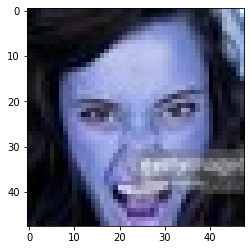

In [ ]:
data='./dataset'
import cv2
for category in class_names:
    path=os.path.join(data, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
training_data=[]
IMG_SIZE=48
def create_training_data():
    for category in class_names:
        path=os.path.join(data, category)
        class_num=class_names.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data() 
'''Ver la cantidad de datos'''
print(len(training_data))

7014


In [ ]:
lenofimage = len(training_data)
'''Creacion de la variable x and y'''
X=[]
y=[]

'''Mostrar las categorias'''
for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
'''Cantidad de datos'''
X.shape
'''Dividir x en numero maximo de pixel'''
X = X/255.0
'''La variable x en position 1'''
X[1]

array([0.24705882, 0.36862745, 0.61568627, ..., 0.40392157, 0.58823529,
       0.67058824])

In [ ]:
y=np.array(y)
y.shape

(7014,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
from sklearn.svm import SVC
'''Asignacion del kernel'''
#svc = SVC(kernel='linear',gamma='auto')
#svc.fit(X_train, y_train)

'Asignacion del kernel'

In [ ]:
'''Creacion kernel Lineal'''
linear_param_grid = {
    
        "kernel": ["linear"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "decision_function_shape": ['ovo', 'ovr']
}
'''Librerias para usar SVM en el modelo'''
from sklearn import svm
from sklearn.model_selection import GridSearchCV
linear_grid = GridSearchCV(svm.SVC(), linear_param_grid)
linear_grid.fit(X_train,y_train)
print(linear_grid.best_estimator_)

'''Libreria para las metricas'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
linear_pred = linear_grid.predict(X_test)
'''Creacion de metricas'''
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_precision = precision_score(y_test, linear_pred, average='weighted')
linear_recall = recall_score(y_test, linear_pred, average='weighted')
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))
print('Precision (Linear Kernel): ', "%.2f" % (linear_precision*100))
print('Recall (Linear Kernel): ', "%.2f" % (linear_recall*100))

SVC(C=0.001, decision_function_shape='ovo', kernel='linear')
Accuracy (Linear Kernel):  22.92
F1 (Linear Kernel):  22.80
Precision (Linear Kernel):  23.53
Recall (Linear Kernel):  22.92


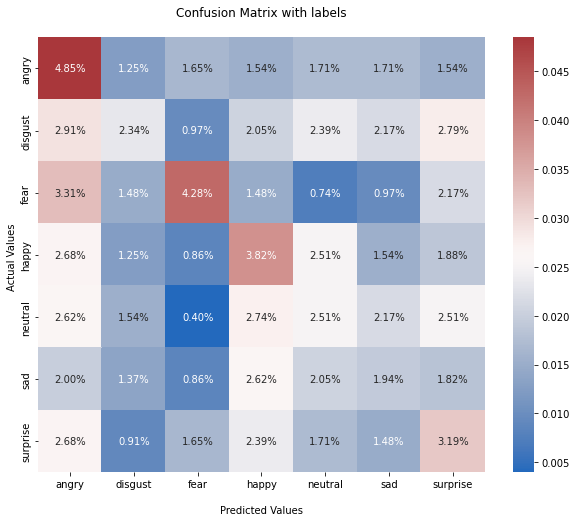

In [ ]:
'''Creacion de las imagenes'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, linear_pred)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='vlag')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
'''Graficar la matriz'''
plt.show()